1. Loading & Exploring Data

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

In [ ]:
cancer =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None, sep=",")
cancer.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
attribute_name = []
attribute_name.append("case_id")
attribute_name.append("type")

a = ['radius','texture','perimeter','area','smoothness','compactness',
     'concavity','concave points','symmetry','fractal dimension']

for i in range(0,10):
    b = "mean_" + a[i] 
    attribute_name.append(b)   
for i in range(0,10):
    b = "se_" + a[i]
    attribute_name.append(b)    
for i in range(0,10):
    b = "worst_" + a[i]
    attribute_name.append(b)

In [ ]:
cancer.columns = attribute_name
cancer.head()

,case_id,type,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave points,se_symmetry,se_fractal dimension,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = cancer.iloc[:,2:]
y = cancer.iloc[:,1:2]

In [ ]:
X.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave points,se_symmetry,se_fractal dimension,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


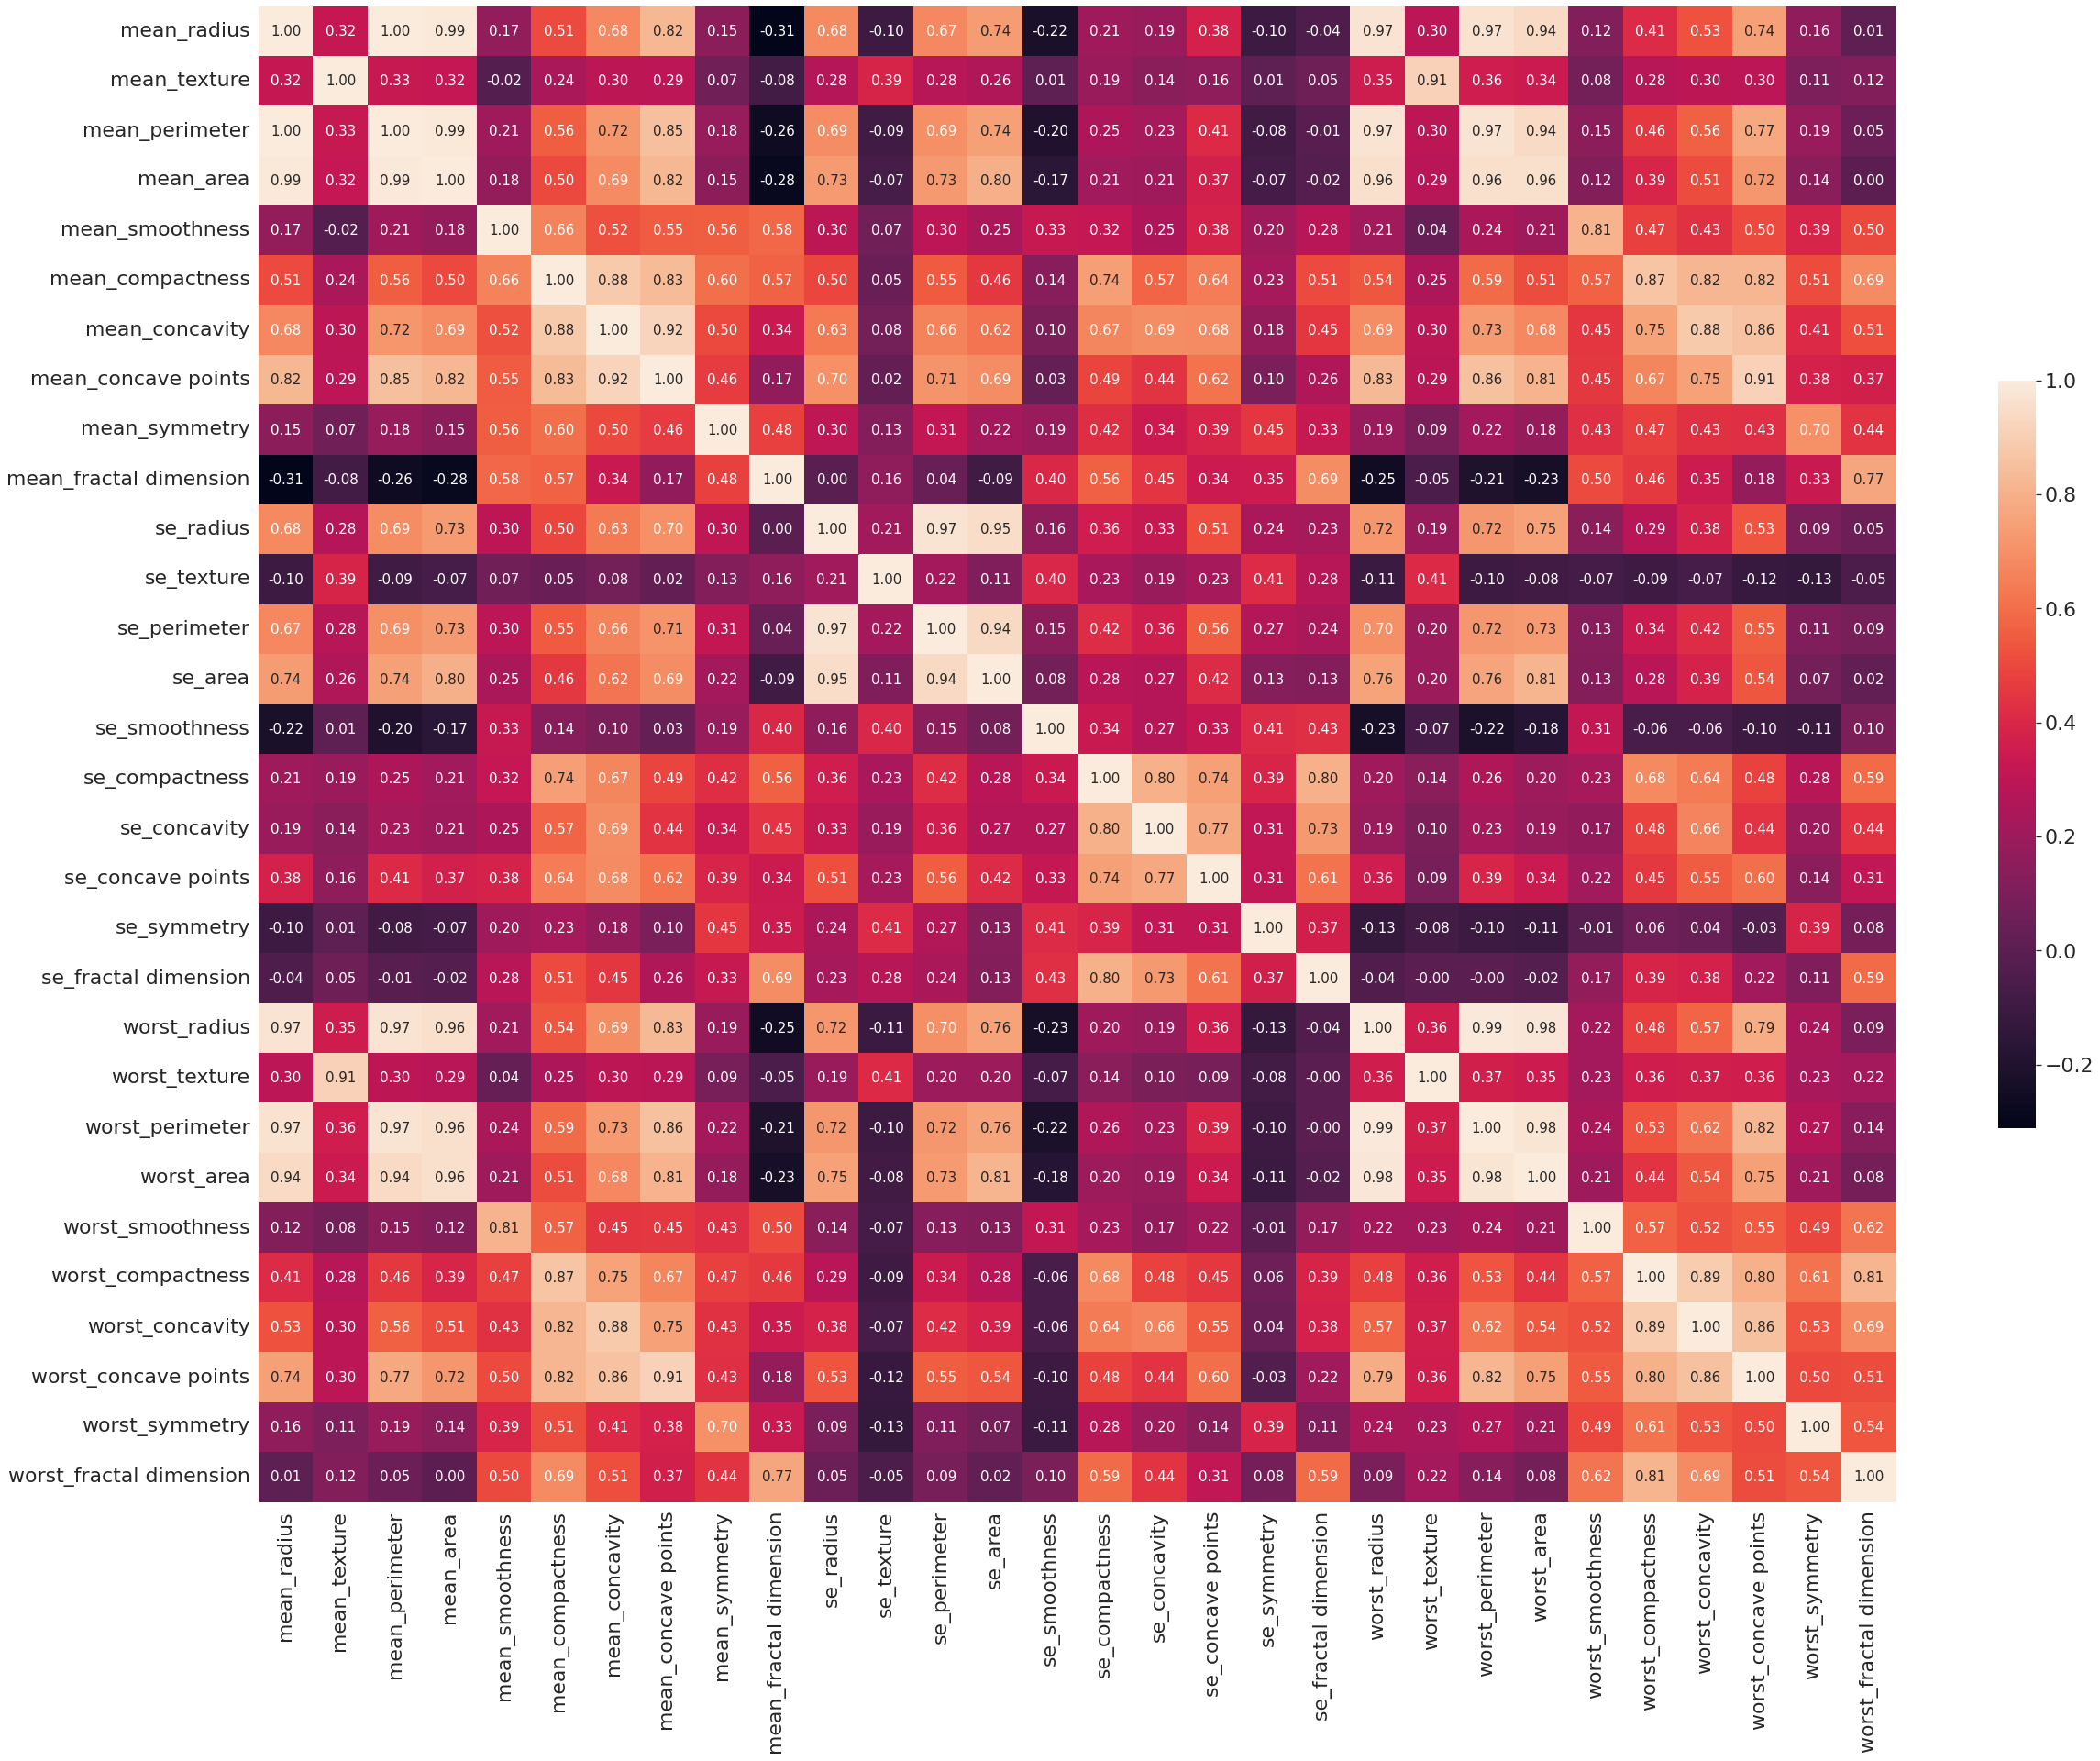

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

cm = np.corrcoef(X.values.T)
plt.figure(figsize=(40,30))  
sns.set(font_scale=2)
hm = sns.heatmap(cm,                # Plot rectangular data as a color-encoded matrix
                 cbar=True,         # Whether to draw a colorbar.
                 annot=True,        # If True, write the data value in each cell.
                 square=False,       # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 fmt='.2f',         # String formatting code to use when adding annotations.
                 annot_kws={'size': 15}, # Keyword arguments for ax.text when annot is True
                 cbar_kws={"shrink": 0.5},
                 yticklabels=cancer.iloc[:,2:].columns, 
                 xticklabels=cancer.iloc[:,2:].columns)
#plt.tight_layout()
plt.show()

2. Model Construction¶

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
print('Labels counts in y: '+str(dict(y['type'].value_counts())))
print()
print('Labels counts in y_train: '+str(dict(y_train['type'].value_counts())))
print()
print('Labels counts in y_test: '+str(dict(y_test['type'].value_counts())))

Labels counts in y: {'B': 357, 'M': 212}

Labels counts in y_train: {'B': 250, 'M': 148}

Labels counts in y_test: {'B': 107, 'M': 64}


In [ ]:
def get_report(): 
    report = pd.DataFrame(columns=["Accuracy","Precision","Recall","F Measure"],index=["In-Sample","Out-of-Sample"])
    report.iloc[0,0] = accuracy_score(y_test, y_pred)
    report.iloc[1,0] = accuracy_score(y_train, y_pred_insample)
    report.iloc[0,1] = precision_score(y_test, y_pred, pos_label = "M")
    report.iloc[1,1] = precision_score(y_train, y_pred_insample, pos_label = "M")
    report.iloc[0,2] = recall_score(y_test, y_pred, pos_label = "M")
    report.iloc[1,2] = recall_score(y_train, y_pred_insample, pos_label = "M")
    report.iloc[0,3] = f1_score(y_test, y_pred, pos_label = "M")
    report.iloc[1,3] = f1_score(y_train, y_pred_insample, pos_label = "M")

    return report.astype(float).round(3)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix \nWithout Normalization',
                          cmap=plt.cm.Blues):
    import itertools
    if normalize:
        title = 'Normalized Confusion Matrix'
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)#,fontsize=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes) #rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 #fontsize = 15,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

kNN

In [ ]:
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
sc.fit(X_train) # Compute the mean and std to be used for later scaling.
X_train_std = sc.transform(X_train) # Perform standardization of train set X by centering and scaling
X_test_std = sc.transform(X_test) # Perform standardization of test set X by centering and scaling

In [ ]:
from sklearn import neighbors, datasets

knn = neighbors.KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski') # standard Euclidean distance

knn.fit(X_train_std, y_train.values.ravel())
#.values will give the values in an array. (shape: (n,1)
#.ravel will convert that array shape to (n, )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
y_pred = knn.predict(X_test_std)
y_pred_insample = knn.predict(X_train_std)

In [ ]:
get_report()

,Accuracy,Precision,Recall,F Measure
In-Sample,0.959,0.983,0.906,0.943
Out-of-Sample,0.987,0.993,0.973,0.983


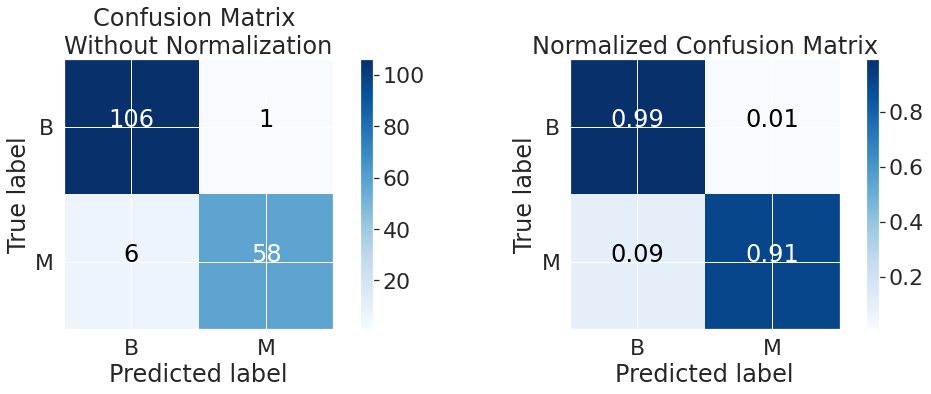

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)

figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=np.unique(y))

plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=np.unique(y), normalize=True)

plt.show() 

Logistics

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100) 
lr = lr.fit(X_train, y_train.values.ravel())
print('The weights of the attributes are:\n')
print(lr.coef_)
print()

y_pred = lr.predict(X_test)           
y_pred_insample = lr.predict(X_train)

The weights of the attributes are:

[[-2.22131923 -0.10786975  0.16518345 -0.00447689  0.08062706  0.38747179
   0.56196677  0.23831294  0.12148906  0.02339031 -0.10754273 -0.93280864
  -0.12935344  0.10672468  0.01100984  0.0804129   0.12216617  0.03363215
   0.0369065   0.00727477 -2.34744802  0.40347508  0.17477647  0.03288826
   0.14744177  1.13791166  1.49082399  0.44099081  0.42264073  0.11184676]]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
get_report()

,Accuracy,Precision,Recall,F Measure
In-Sample,0.959,0.983,0.906,0.943
Out-of-Sample,0.955,0.945,0.932,0.939


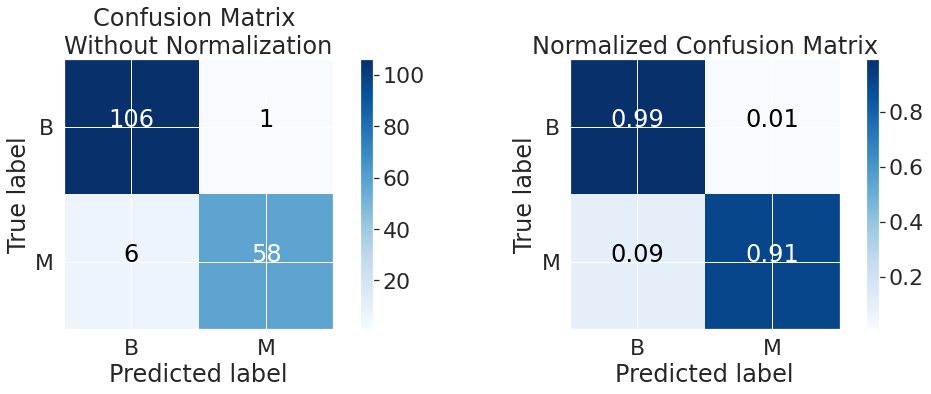

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)

figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=np.unique(y))

plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=np.unique(y), normalize=True)

plt.show() 